In [3]:
!python3 -V

Python 3.10.6


In [4]:
! ls -d */

cifar_PNG_test/  cifar_PNG_train/  data/  mnist_PNG_test/  mnist_PNG_train/


### dl box 5 のcuda指定

import torch
print(torch.cuda.current_device())

torch.cuda.set_device("cuda:3")
print(torch.cuda.current_device())

In [5]:
import os

root_path = os.getcwd()
root_path

'/work'

In [6]:
import torch

print(torch.__version__)

1.13.1+cu117


In [7]:
import torchvision

print(torchvision.__version__)

0.14.1+cu117


In [8]:
print(torch.cuda.is_available())

True


In [9]:
print(torch.cuda.device_count())

1


In [10]:
print(torch.cuda.current_device())

0


In [11]:
print(torch.cuda.get_device_name())

NVIDIA GeForce RTX 3060 Ti


In [12]:
#例えばCUDA_VISIBLE_DEVICESを0とすると0番のGPUのみ、0, 2とすると0番と2番のGPUのみが使用される。-1とするとすべてのGPUが使用されなくなる
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#print(torch.cuda.is_available())
# False
#print(torch.cuda.device_count())
# 0


In [13]:
#データ確認

In [14]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

dir_path = "./cifar_PNG_train"
fig = plt.figure(figsize=(25, 4))
category = os.listdir(dir_path)

<Figure size 2500x400 with 0 Axes>

In [15]:
category

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

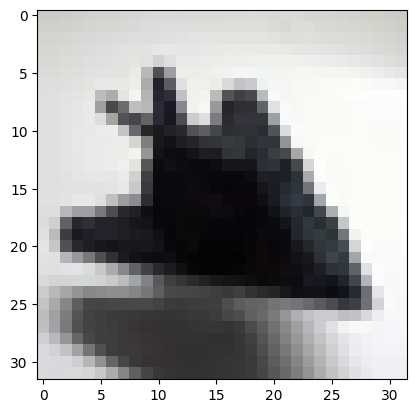

In [16]:
img_name = os.listdir(os.path.join(dir_path , category[0]))
im = Image.open(os.path.join(dir_path , category[0],img_name[0]))
plt.imshow(im)

In [17]:
print(im.size)

(32, 32)


In [18]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [19]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# CFIRデータ読み込み
trans = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     #RGBを-1~1に変換
    ])

png_path = os.path.join(root_path,"cifar_PNG_train")
batch_size = 64

images = torchvision.datasets.ImageFolder(png_path, transform = trans)
trainloader = torch.utils.data.DataLoader(images, batch_size = batch_size, shuffle = True, num_workers=2)


png_path = os.path.join(root_path,"cifar_PNG_test")
images_test = torchvision.datasets.ImageFolder(png_path, transform = trans)
testloader = torch.utils.data.DataLoader(images_test, batch_size = batch_size, shuffle = False, num_workers=2)


In [21]:
images

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: /work/cifar_PNG_train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [22]:
imgs, labels = next(iter(trainloader))

x = imgs[0].to('cpu').detach().numpy().copy()
x.shape

(3, 32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


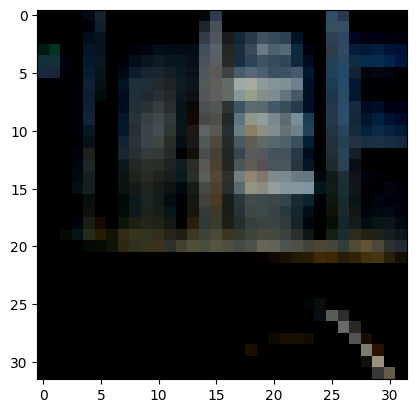

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


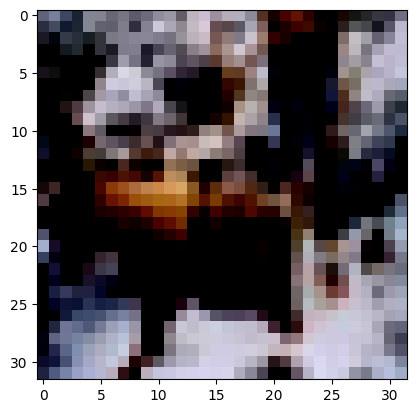

In [25]:
def image_show(data_loader,n):
    #Augmentationした画像データを読み込む
    tmp = iter(data_loader)
    images,labels = next(tmp)
    #画像をtensorからnumpyに変換
    images = images.numpy()
    #n枚の画像を1枚ずつ取り出し、表示する
    for i in range(n):
        image = np.transpose(images[i],[1,2,0])
        plt.imshow(image)
        plt.show()

image_show(trainloader,2)


In [ ]:
for X, y in trainloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

In [136]:
print("image shape ==>;",imgs[0].shape)

image shape ==>; torch.Size([3, 32, 32])


In [137]:
#torch.transpose(imgs[0], 0,2).shape

In [138]:
def unnorm(img, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]):
    def_img = img.detach().clone()
    for t, m, s in zip(def_img, mean, std):
        t.detach()
        t.mul_(s).add_(m)
    return def_img


Label is  6


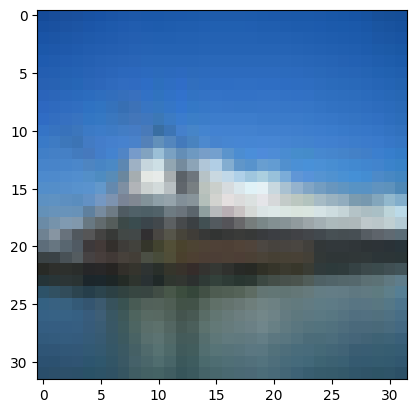

In [139]:
pic = transforms.ToPILImage(mode='RGB')(unnorm(imgs[2]))
plt.imshow(pic)
print("Label is ",labels[0].numpy())

In [140]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [141]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [142]:
from torchsummary import summary

In [143]:
summary(net.to(torch.device('cuda')), input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [144]:
batch, label = next(iter(trainloader))

In [145]:
label

tensor([0, 8, 8, 9, 5, 3, 4, 5, 4, 9, 0, 6, 1, 5, 9, 2, 9, 1, 0, 9, 6, 3, 8, 2,
        7, 0, 4, 8, 7, 7, 5, 1, 3, 0, 1, 8, 0, 4, 3, 8, 8, 4, 3, 0, 1, 4, 5, 8,
        2, 9, 7, 5, 6, 0, 2, 0, 1, 1, 5, 2, 8, 0, 7, 2])

In [146]:
#data = torch.randn(3,32,32)

In [147]:
yhat = net(batch.to(torch.device('cuda')))

In [148]:
#from torchviz import make_dot
#http://ruby.kyoto-wu.ac.jp/info-com/Softwares/Graphviz/
#imim = make_dot(yhat)
#imim.format = 'png'
#imim.render('./graph_image')

#graph vizのdotコマンドのpathを通すこと

In [149]:
#imim

In [150]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [151]:
for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(torch.device('cuda'))
        labels = labels.to(torch.device('cuda'))
        net = net.to(torch.device('cuda'))
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print(f'[epoch = {epoch + 1}, i = {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[epoch = 1, i =   500] loss: 0.575
[epoch = 2, i =   500] loss: 0.549
[epoch = 3, i =   500] loss: 0.489
[epoch = 4, i =   500] loss: 0.435
[epoch = 5, i =   500] loss: 0.410
[epoch = 6, i =   500] loss: 0.391
[epoch = 7, i =   500] loss: 0.377
[epoch = 8, i =   500] loss: 0.362
[epoch = 9, i =   500] loss: 0.347
[epoch = 10, i =   500] loss: 0.336
[epoch = 11, i =   500] loss: 0.327
[epoch = 12, i =   500] loss: 0.314
[epoch = 13, i =   500] loss: 0.305
[epoch = 14, i =   500] loss: 0.298
[epoch = 15, i =   500] loss: 0.291
[epoch = 16, i =   500] loss: 0.283
[epoch = 17, i =   500] loss: 0.276
[epoch = 18, i =   500] loss: 0.272
[epoch = 19, i =   500] loss: 0.266
[epoch = 20, i =   500] loss: 0.261
[epoch = 21, i =   500] loss: 0.255
[epoch = 22, i =   500] loss: 0.251
[epoch = 23, i =   500] loss: 0.246
[epoch = 24, i =   500] loss: 0.244
[epoch = 25, i =   500] loss: 0.238
[epoch = 26, i =   500] loss: 0.233
[epoch = 27, i =   500] loss: 0.232
[epoch = 28, i =   500] loss: 0.229
[

KeyboardInterrupt: 

In [ ]:
i

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


dataiter = iter(testloader)
images, labels = next(dataiter)

labels = labels.to(torch.device('cuda'))
images = images.to(torch.device('cuda'))

# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
#load

net = Net()
net.load_state_dict(torch.load(PATH))
net = net.to(torch.device('cuda'))

for param in net.parameters():
    param.requires_grad = False


In [ ]:
outputs = net(images)

In [ ]:
#from torchvision.io import read_image

#!wget 'https://images.unsplash.com/photo-1553284965-83fd3e82fa5a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8NHx8fGVufDB8fHx8&w=1000&q=80'  -O white_horse.jpg
#white_torch = torchvision.io.read_image('white_horse.jpg')

from PIL import Image

im1 = torchvision.transforms.ToPILImage()(unnorm(images[0])).resize((100,100))
im2 = torchvision.transforms.ToPILImage()(unnorm(images[1])).resize((100,100))
im3 = torchvision.transforms.ToPILImage()(unnorm(images[2])).resize((100,100))
im4 = torchvision.transforms.ToPILImage()(unnorm(images[3])).resize((100,100))

def get_concat_h(im1, im2,im3,im4):
    dst = Image.new('RGB', (im1.width + im2.width +  im3.width + im4.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width + im2.width, 0))
    dst.paste(im4, (im1.width + im2.width + im3.width, 0))
    return dst



In [ ]:
get_concat_h(im1, im2,im3,im4)#.save('data/dst/pillow_concat_h.jpg')


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

In [ ]:

stack_pred_label = []
stack_true_label = []

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        labels = labels.to(torch.device('cuda'))
        images = images.to(torch.device('cuda'))
        
        # calculate outputs by running images through the network
        outputs = net(images)
        
        stack_true_label.extend(np.array(labels.detach().cpu().numpy()))

        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        
        stack_pred_label.extend(np.array(predicted.detach().cpu().numpy()))
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

cm = confusion_matrix(stack_true_label, stack_pred_label)


In [ ]:
#print(cm)

In [ ]:
#sns.heatmap(cm)
#plt.savefig('data/dst/sklearn_confusion_matrix.png')

In [ ]:
#sns.heatmap(cm, annot=True, cmap='Blues')
#plt.savefig('data/dst/sklearn_confusion_matrix_annot_blues.png')

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm)

In [ ]:
class_names=[0,1,2,3,4,5,6,7,8,9]
#class_names = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=class_names, figsize=(20, 20), cmap='Blues')

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
                
        labels = labels.to(torch.device('cuda'))
        images = images.to(torch.device('cuda'))
        
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# mnist net

In [43]:
mean = (0.5,)
std = (0.5,)

#mnist
trans = transforms.Compose([
    transforms.ToTensor(),
    torchvision.transforms.Grayscale(num_output_channels=1),
    transforms.Normalize(mean, std)
    ])

batch_size = 64

png_path = os.path.join(root_path,"mnist_PNG_train")

images = torchvision.datasets.ImageFolder(png_path, transform = trans)
trainloader = torch.utils.data.DataLoader(images, batch_size = batch_size, shuffle = True, num_workers=2)

png_path = os.path.join(root_path,"mnist_PNG_test")

images_test = torchvision.datasets.ImageFolder(png_path, transform = trans)
testloader = torch.utils.data.DataLoader(images_test, batch_size = batch_size, shuffle = False, num_workers=2)


In [44]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 26x26x64 -> 24x24x64 
        self.pool = nn.MaxPool2d(2, 2) # 24x24x64 -> 12x12x64
        self.dropout1 = nn.Dropout()
        self.fc1 = nn.Linear(12 * 12 * 64, 128)
        self.dropout2 = nn.Dropout()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 12 * 12 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [45]:
net = Net()
net = net.to(torch.device('cuda'))

In [46]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [47]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),
                      lr=0.0005, momentum=0.99, nesterov=True)

In [48]:
batch, label = next(iter(trainloader))

In [49]:
x = batch[0].detach().numpy().copy()
x.shape

(1, 28, 28)

In [50]:
yhat = net(batch.to(torch.device('cuda')))

#imim = make_dot(yhat)
#imim.format = 'png'
#imim.render('mnist')


In [51]:
#imim

In [52]:
epochs = 3

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(torch.device('cuda')))
        loss = criterion(outputs, labels.to(torch.device('cuda')))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:
            print('[{:d}, {:5d}] loss: {:.3f}'
                    .format(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.159
[1,   200] loss: 1.039
[1,   300] loss: 0.605
[1,   400] loss: 0.481
[1,   500] loss: 0.422
[1,   600] loss: 0.353
[1,   700] loss: 0.323
[1,   800] loss: 0.279
[1,   900] loss: 0.255
[2,   100] loss: 0.185
[2,   200] loss: 0.184
[2,   300] loss: 0.177
[2,   400] loss: 0.184
[2,   500] loss: 0.142
[2,   600] loss: 0.143
[2,   700] loss: 0.153
[2,   800] loss: 0.151
[2,   900] loss: 0.126
[3,   100] loss: 0.129
[3,   200] loss: 0.107
[3,   300] loss: 0.119
[3,   400] loss: 0.118
[3,   500] loss: 0.118
[3,   600] loss: 0.101
[3,   700] loss: 0.111
[3,   800] loss: 0.111
[3,   900] loss: 0.108
Finished Training


In [53]:
correct = 0
total = 0

with torch.no_grad():
    for (images, labels) in testloader:
        outputs = net(images.to(torch.device('cuda')))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(torch.device('cuda'))).sum().item()
print('Accuracy: {:.2f} %%'.format(100 * float(correct/total)))

Accuracy: 97.00 %%


# 以下、モデルの別の書き方？

In [54]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
net = net.to(torch.device('cuda'))

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
%%time

#Seed
torch.manual_seed(1234)

for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(torch.device('cuda')), labels.to(torch.device('cuda'))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, loss.item()))
#             print('[%d, %5d] loss: %.3f' % (epoch + 1, i, running_loss / 500))
#             running_loss = 0.0

print('Finished Training')


[1,   500] loss: 1.363
[2,   500] loss: 0.587
[3,   500] loss: 0.146
Finished Training
CPU times: user 1min 8s, sys: 3.54 s, total: 1min 11s
Wall time: 10min 38s


# make validation & transfer learning

In [57]:

#CFIR
trans = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     #RGBを-1~1に変換
    ])

png_path = os.path.join(root_path,"cifar_PNG_train")
images = torchvision.datasets.ImageFolder(png_path, transform = trans)

batch_size = 640

trainloader = torch.utils.data.DataLoader(images, batch_size = batch_size, shuffle = True, num_workers=2)

png_path = os.path.join(root_path,"cifar_PNG_test")
images_test = torchvision.datasets.ImageFolder(png_path, transform = trans)
testloader = torch.utils.data.DataLoader(images_test, batch_size = batch_size, shuffle = False, num_workers=2)



### mnist を読み込む場合

mean = (0.5,)
std = (0.5,)


trans = transforms.Compose([
    transforms.ToTensor(),
    torchvision.transforms.Grayscale(num_output_channels=1),
    transforms.Normalize(mean, std)
    ])

batch_size = 640

png_path = str(root_path) + "\\mnist_PNG_train"
images = torchvision.datasets.ImageFolder(png_path, transform = trans)


png_path = str(root_path) + "\\mnist_PNG_test"
images_test = torchvision.datasets.ImageFolder(png_path, transform = trans)
testloader = torch.utils.data.DataLoader(images_test, batch_size = batch_size, shuffle = False, num_workers=2)


In [58]:
n_samples = len(images)
train_size = int(n_samples * 0.8) 
val_size = n_samples - train_size 

train_dataset, val_dataset = torch.utils.data.random_split(images, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers=2)

valloader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, shuffle = True, num_workers=2)


In [60]:
import time
import copy
import os

In [61]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [62]:
from sklearn.metrics import accuracy_score

# バリデーションを行う学習サイクルを作っておく

In [63]:

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    train_preds_stack = []
    train_true_stack = []
    val_preds_stack = []
    val_true_stack = []

    train_loss_ls = []
    train_accuracy_ls = []
    val_loss_ls = []
    val_accuracy_ls = []

    epoch_num = []

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    model = model.to(device)

    for epoch in range(num_epochs):
        
        epoch_num.append(epoch)
        
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                
                total = 0
                correct = 0
                all_loss = 0
                for inputs, labels in trainloader:
                    
                    optimizer.zero_grad()
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                                        
                    loss.backward()
                    optimizer.step()
                                        
                    total += labels.size(0)
                    correct += (preds == labels).sum().item()
                    all_loss += loss.item()
                
                res_loss = (all_loss)# / total
                res_acc = (100 * correct / total)
                
                train_loss_ls.append(res_loss)
                train_accuracy_ls.append(res_acc)

            else:
                model.eval()   # Set model to evaluate mode

                with torch.set_grad_enabled(phase == 'val'):
                    
                    total = 0
                    correct = 0
                    all_loss = 0
                    
                    for inputs, labels in valloader:
                        inputs = inputs.to(device)
                        labels = labels.to(device)
                        
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)
                                       
                        total += labels.size(0)
                        correct += (preds == labels).sum().item()
                        all_loss += loss.item()
                
                    res_loss = (all_loss) # / total
                    res_acc = (100 * correct / total)
                    
                    val_loss_ls.append(res_loss)
                    val_accuracy_ls.append(res_acc)
                    
                    epoch_loss = res_loss
                    epoch_acc = res_acc
                                        
                    print(str(phase) + " val_Loss: " + str(round(epoch_loss,5)) + " val_Acc: " + str(epoch_acc))

                
            if phase == 'train':
                scheduler.step()
                
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:    
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
            ##############
            
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')
    
    plt.subplot(1,2,1)
    #plt.figure()
    #plt.title("Learning Curve")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    
    plt.plot(epoch_num, train_loss_ls, 'o-', color="r", label="Training loss")
    plt.plot(epoch_num, val_loss_ls, 'o-', color="g", label="Validation loss")
    plt.legend(loc='upper left')
    
    plt.subplot(1,2,2)
    plt.xlabel("epoch")
    plt.ylabel("acc")
    
    plt.plot(epoch_num, train_accuracy_ls, 'o-', color="r", label="Training acc")
    plt.plot(epoch_num, val_accuracy_ls, 'o-', color="g", label="Validation acc")
    plt.legend(loc='upper left')
    
    plt.show()


    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Resnetを使って最終の全結合層のfine tune 試す

In [152]:
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

In [153]:
model_ft.fc = nn.Linear(num_ftrs, 10)

In [154]:
# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = False

last_layer = list(model_ft.children())[-1]

print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

except last layer: Linear(in_features=512, out_features=300, bias=True)


In [155]:
# もし全結合以外もfine tuneするなら
# unfreeze all layers
#for param in model_ft.parameters():
#    param.requires_grad = True

In [156]:

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [157]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [70]:


#data_dir = str(root_path) + "\\cifar_PNG_train"

#dir 下にtrainとval フォルダがあるばあい,os.path.join(data_dir, x)
#image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir), data_transforms[x]) for x in ['train', 'val']}
#dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}

#dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
#class_names = image_datasets['train'].classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [71]:
print(list(model_ft.parameters()))

[Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01

Epoch 0/14
----------
val val_Loss: 32.39824 val_Acc: 28.32
Epoch 1/14
----------
val val_Loss: 29.70458 val_Acc: 35.76
Epoch 2/14
----------
val val_Loss: 28.34368 val_Acc: 39.09
Epoch 3/14
----------
val val_Loss: 27.61752 val_Acc: 41.18
Epoch 4/14
----------
val val_Loss: 27.20209 val_Acc: 42.53
Epoch 5/14
----------
val val_Loss: 26.71864 val_Acc: 43.31
Epoch 6/14
----------
val val_Loss: 26.42668 val_Acc: 44.27
Epoch 7/14
----------
val val_Loss: 26.43784 val_Acc: 43.78
Epoch 8/14
----------
val val_Loss: 26.4466 val_Acc: 43.86
Epoch 9/14
----------
val val_Loss: 26.29388 val_Acc: 44.16
Epoch 10/14
----------
val val_Loss: 26.27849 val_Acc: 44.33
Epoch 11/14
----------
val val_Loss: 26.31905 val_Acc: 44.39
Epoch 12/14
----------
val val_Loss: 26.27126 val_Acc: 44.33
Epoch 13/14
----------
val val_Loss: 26.19591 val_Acc: 44.34
Epoch 14/14
----------
val val_Loss: 26.27513 val_Acc: 44.2
Training complete in 22m 32s
Best val Acc: 44.390000


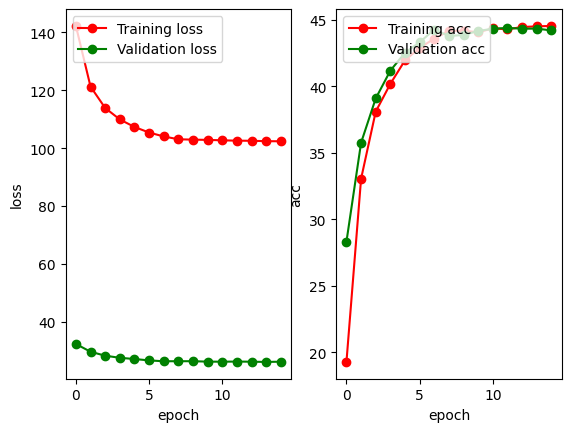

In [72]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [73]:
print(list(model_ft.parameters()))


[Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01

# effici

In [74]:
from efficientnet_pytorch import EfficientNet

model_b0 = EfficientNet.from_pretrained('efficientnet-b0')
model_b7 = EfficientNet.from_pretrained('efficientnet-b7')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b7


In [75]:
#print(model_b0)

In [76]:
#print(model_b7)

In [77]:
num_ftrs = model_b0._fc.in_features
model_b0._fc = nn.Linear(num_ftrs, 10)

In [78]:
for param in model_b0.parameters():
    param.requires_grad = False

last_layer = list(model_b0.children())[7]

print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

except last layer: Linear(in_features=1280, out_features=10, bias=True)


In [79]:
list(model_b0.children())[7]

Linear(in_features=1280, out_features=10, bias=True)

In [80]:
model_b0.to(device)

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [81]:

#print(list(model_b0.parameters()))


Epoch 0/2
----------
val val_Loss: 35.6822 val_Acc: 18.42
Epoch 1/2
----------
val val_Loss: 33.07455 val_Acc: 31.98
Epoch 2/2
----------
val val_Loss: 30.81076 val_Acc: 37.88
Training complete in 3m 14s
Best val Acc: 37.880000


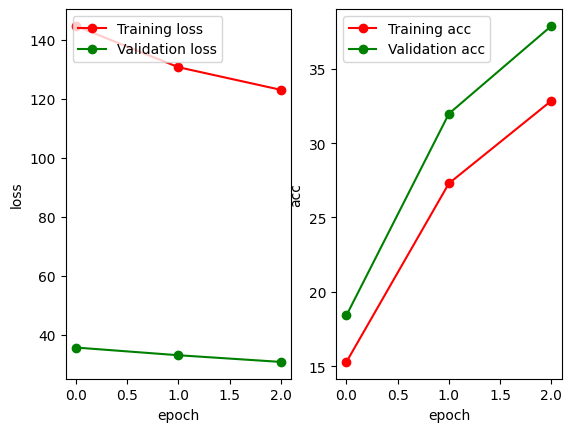

In [82]:


criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b0.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_b0 = train_model(model_b0, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=3)

In [83]:
num_ftrs = model_b7._fc.in_features
model_b7._fc = nn.Linear(num_ftrs, 10)

# freeze layers except last layer
for param in model_b7.parameters():
    param.requires_grad = False

last_layer = list(model_b7.children())[7]

print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

except last layer: Linear(in_features=2560, out_features=10, bias=True)


Epoch 0/4
----------
val val_Loss: 40.18425 val_Acc: 9.72
Epoch 1/4
----------
val val_Loss: 41.04702 val_Acc: 10.17
Epoch 2/4
----------
val val_Loss: 42.92939 val_Acc: 11.99
Epoch 3/4
----------
val val_Loss: 32.34659 val_Acc: 29.49
Epoch 4/4
----------
val val_Loss: 32.46695 val_Acc: 29.35
Training complete in 5m 23s
Best val Acc: 29.490000


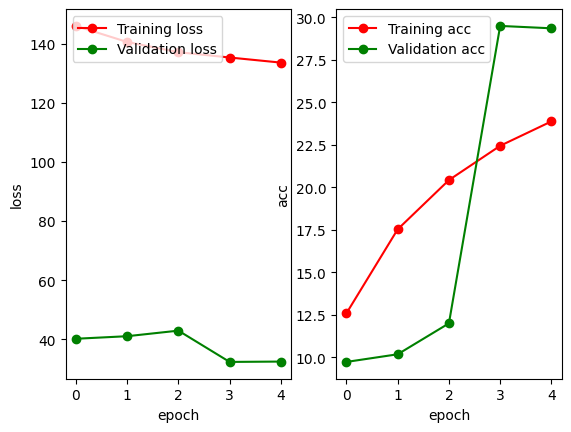

In [84]:
model_b7.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_b7.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_b7 = train_model(model_b7, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=5)

# もっとほか

In [85]:

#CFIR
trans = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     #RGBを-1~1に変換
    ])

png_path = os.path.join(root_path,"cifar_PNG_train")

images = torchvision.datasets.ImageFolder(png_path, transform = trans)

n_samples = len(images)
train_size = int(n_samples * 0.8) 
val_size = n_samples - train_size 

batch_size = 128

train_dataset, val_dataset = torch.utils.data.random_split(images, [train_size, val_size])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, shuffle = True, num_workers=2)

png_path = os.path.join(root_path,"cifar_PNG_test")
images_test = torchvision.datasets.ImageFolder(png_path, transform = trans)
testloader = torch.utils.data.DataLoader(images_test, batch_size = batch_size, shuffle = False, num_workers=2)


In [94]:
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [95]:
model_ft = models.mobilenet_v3_small(pretrained=True)
#model_ft
#model_ft.classifier
#model_ft.classifier[3]

except last layer: Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=10, bias=True)
)
Epoch 0/14
----------
val val_Loss: 129.20003 val_Acc: 40.71
Epoch 1/14
----------
val val_Loss: 114.99632 val_Acc: 47.53
Epoch 2/14
----------
val val_Loss: 105.94273 val_Acc: 51.76
Epoch 3/14
----------
val val_Loss: 99.80197 val_Acc: 54.82
Epoch 4/14
----------
val val_Loss: 97.76592 val_Acc: 56.19
Epoch 5/14
----------
val val_Loss: 93.58538 val_Acc: 57.91
Epoch 6/14
----------
val val_Loss: 91.37109 val_Acc: 58.41
Epoch 7/14
----------
val val_Loss: 89.9666 val_Acc: 59.32
Epoch 8/14
----------
val val_Loss: 89.58764 val_Acc: 59.48
Epoch 9/14
----------
val val_Loss: 89.67101 val_Acc: 59.49
Epoch 10/14
----------
val val_Loss: 89.60359 val_Acc: 59.57
Epoch 11/14
----------
val val_Loss: 89.39539 val_Acc: 59.81
Epoch 12/14
----------
val val_Loss: 88.83334 val_Acc: 59.61
Epoch 

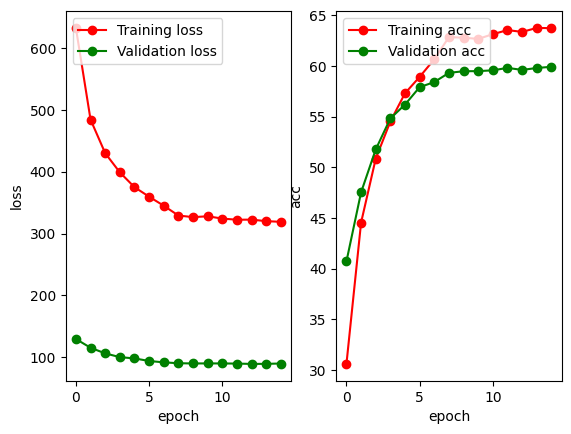

In [97]:
#num_ftrs = model_ft.fc.in_features
num_ftrs = model_ft.classifier[3].in_features
model_ft.classifier[3] = nn.Linear(num_ftrs, 10)






# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')

for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [98]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
                
        labels = labels.to(torch.device('cuda'))
        images = images.to(torch.device('cuda'))
        
        outputs = model_ft(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.2 %
Accuracy for class: car   is 67.7 %
Accuracy for class: bird  is 44.0 %
Accuracy for class: cat   is 42.4 %
Accuracy for class: deer  is 51.5 %
Accuracy for class: dog   is 52.7 %
Accuracy for class: frog  is 71.5 %
Accuracy for class: horse is 63.2 %
Accuracy for class: ship  is 70.3 %
Accuracy for class: truck is 65.9 %


In [159]:
#
model_ft = models.vgg16_bn(pretrained=True)
#
#model_ft

#num_ftrs = model_ft.fc.in_features
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs, 10)


In [ ]:
# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [161]:
model_ft = models.wide_resnet50_2(pretrained=True)

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

In [ ]:

# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [163]:

#
model_ft = models.mobilenet_v2(pretrained=True)

num_ftrs = model_ft.classifier[1].in_features
model_ft.classifier[1] = nn.Linear(num_ftrs, 10)


In [ ]:

# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [165]:
model_ft = models.densenet121(pretrained=True)

num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 10)

In [ ]:
# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [167]:
model_ft = models.resnext50_32x4d(pretrained=True)

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)


In [ ]:


# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [169]:
#
model_ft = models.convnext_base(pretrained=True)
#

num_ftrs = model_ft.classifier[2].in_features
model_ft.classifier[2] = nn.Linear(num_ftrs, 10)


In [ ]:

# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

In [175]:
model_ft = models.vit_b_32(pretrained=True)

num_ftrs = model_ft.heads[0].in_features
model_ft.heads[0] = nn.Linear(num_ftrs, 10)


In [ ]:

# freeze layers except last layer
for param in model_ft.parameters():
    param.requires_grad = True #False
last_layer = list(model_ft.children())[-1]
print(f'except last layer: {last_layer}')
for param in last_layer.parameters():
    param.requires_grad = True

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)